In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rottentomatoes/rotten_tomatoes_movies.csv
/kaggle/input/rottentomatoes/rotten_tomatoes_critic_reviews.csv
/kaggle/input/glove-embeddings/glove.6B.100d.txt


In [2]:
# Importing the Datasets

import pandas as pd
Movies = pd.read_csv("/kaggle/input/rottentomatoes/rotten_tomatoes_movies.csv")
Reviews = pd.read_csv("/kaggle/input/rottentomatoes/rotten_tomatoes_critic_reviews.csv")

In [3]:
list(Reviews.columns)

['rotten_tomatoes_link',
 'critic_name',
 'top_critic',
 'publisher_name',
 'review_type',
 'review_score',
 'review_date',
 'review_content']

In [4]:
Movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [5]:
import numpy as np

# Dropping rows with NA values
Reviews = Reviews.dropna()

# Dropping Duplicates so that there is only one entry per Movie.
Reviews = Reviews.drop_duplicates(subset=['rotten_tomatoes_link'], keep = "first")
Reviews.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
153,m/0878835,Erik Childress,False,eFilmCritic.com,Fresh,3/4,2010-01-31,Holofcener always gives us more to chew on tha...
292,m/10,Scott Weinberg,False,eFilmCritic.com,Fresh,4/5,2002-07-25,Obvious but entertaining portrayal of midlife ...
316,m/1000013-12_angry_men,Steve Rhodes,False,Internet Reviews,Fresh,4/4,2000-01-01,In a time of bloated when special effects have...
369,m/1000079-20000_leagues_under_the_sea,Dragan Antulov,False,rec.arts.movies.reviews,Fresh,7/10,2000-01-01,[The] embodiment of Disney at his best -- fami...


In [6]:
# Merging two Dataframes
newDf = pd.merge(Movies, Reviews, on = "rotten_tomatoes_link", how = "inner") 

# Dropping columns which are not required
newDf.drop(['movie_info','content_rating','genres','directors','authors','actors','original_release_date','tomatometer_top_critics_count','tomatometer_fresh_critics_count','tomatometer_rotten_critics_count','critic_name','top_critic','publisher_name','review_type','review_date','streaming_release_date','runtime','production_company','tomatometer_status','tomatometer_rating','tomatometer_count','audience_status','audience_rating','audience_count'],axis=1,inplace=True)
newDf.head()

,rotten_tomatoes_link,movie_title,critics_consensus,review_score,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,3.5/5,Whether audiences will get behind The Lightnin...
1,m/0878835,Please Give,Nicole Holofcener's newest might seem slight i...,3/4,Holofcener always gives us more to chew on tha...
2,m/10,10,Blake Edwards' bawdy comedy may not score a pe...,4/5,Obvious but entertaining portrayal of midlife ...
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Sidney Lumet's feature debut is a superbly wri...,4/4,In a time of bloated when special effects have...
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","One of Disney's finest live-action adventures,...",7/10,[The] embodiment of Disney at his best -- fami...


In [7]:
# Fetching unique rating scale to generalize the rating
ratingList = np.unique(newDf.review_score).tolist()
max_score = []
for r in range(len(ratingList)):
    temp = ratingList[r].split("/")
    if len(temp) > 1:
        max_score.append(temp[1])
    elif len(temp) == 1:
        max_score.append(temp)
    else:
        pass
    
max_score = [i for b in map(lambda x:[x] if not isinstance(x, list) else x, max_score) for i in b]
uniq_score = np.unique(max_score)
uniq_score

array(['1', '10', '100', '20', '3', '4', '5', '6', '7', '8', '9', 'A',
       'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'D-', 'F'],
      dtype='<U3')

In [8]:
# Generalizing the all the review ratings to standard scale of 5 being highest and 0 being least.
rating = newDf.review_score.tolist()
genrat = []
for r in range(len(rating)):
    temp = rating[r].split("/")
    #print(len(temp))
    if len(temp) > 1:
        if temp[1] == '10':
            score = round(float(temp[0]) / 2)
            genrat.append(score)
        elif temp[1] == '100':
            score = round(float(temp[0]) / 20)
            genrat.append(score)
        elif temp[1] == '20':
            score = round(float(temp[0]) / 4)
            genrat.append(score)
        elif temp[1] == '3':
            score = round(float(temp[0]) * 5 / 3)
            genrat.append(score)
        elif temp[1] == '4':
            score = round(float(temp[0]) * 5 / 4)
            genrat.append(score)
        elif temp[1] == '5':
            score = round(float(temp[0]))
            genrat.append(score)
        elif temp[1] == '6':
            score = round(float(temp[0]) * 5 / 6)
            genrat.append(score)
        elif temp[1] == '7':
            score = round(float(temp[0]) * 5 / 7)
            genrat.append(score)
        elif temp[1] == '8':
            score = round(float(temp[0]) * 5 / 8)
            genrat.append(score)
        elif temp[1] == '9':
            score = round(float(temp[0]) * 5 / 9)
            genrat.append(score)
    elif len(temp) == 1:
        if temp == 'A-' or 'A' or 'A+':
            score = 5
            genrat.append(score)
        elif temp == 'B-' or 'B' or 'B+':
            score = 4
            genrat.append(score)
        elif temp == 'C-' or 'C' or 'C+':
            score = 3
            genrat.append(score)
        elif temp == 'D-' or 'D' or 'D+':
            score = 2
            genrat.append(score)
        elif temp == 'F-' or 'F' or 'F+':
            score = 1
            genrat.append(score)
        else :
            score = temp
            genrat.append(score)
        
           
    
    

In [9]:
newDf['Standard_rating'] = genrat
#newDf = newDf[:2000]

In [10]:
'''# Preprocessing of Data

import spacy
import numpy as np
#from spacy.lang.en.stop_words import STOP_WORDS
#nlp = en_core_web_sm.load()
nlp = spacy.load("en_core_web_sm",disable=["tagger", "parser"])
def preprocess(text):
    # TODO: Replace the next line with your own code.
    doc = nlp(text)
    token_list = []
    for token in doc:
        if token.is_stop == False and token.lemma_.isalpha() and len(token) > 3:
            token_list.append(token.lemma_)
    return(token_list)'''

'# Preprocessing of Data\n\nimport spacy\nimport numpy as np\n#from spacy.lang.en.stop_words import STOP_WORDS\n#nlp = en_core_web_sm.load()\nnlp = spacy.load("en_core_web_sm",disable=["tagger", "parser"])\ndef preprocess(text):\n    # TODO: Replace the next line with your own code.\n    doc = nlp(text)\n    token_list = []\n    for token in doc:\n        if token.is_stop == False and token.lemma_.isalpha() and len(token) > 3:\n            token_list.append(token.lemma_)\n    return(token_list)'

In [11]:
'''newDf['PreProcessedReview'] = None
for i in range(len(newDf)):
    newDf['PreProcessedReview'][i] = " ".join(preprocess(newDf['review_content'][i]))'''

'newDf[\'PreProcessedReview\'] = None\nfor i in range(len(newDf)):\n    newDf[\'PreProcessedReview\'][i] = " ".join(preprocess(newDf[\'review_content\'][i]))'

In [12]:
# Balancing Dataset by removing the Movies which has rating 0 and 1 
# since the number of movies available for each of the rating is very less
newDf = newDf[newDf.Standard_rating != 0]
newDf = newDf[newDf.Standard_rating != 1]
newDf.head()

,rotten_tomatoes_link,movie_title,critics_consensus,review_score,review_content,Standard_rating
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,3.5/5,Whether audiences will get behind The Lightnin...,4
1,m/0878835,Please Give,Nicole Holofcener's newest might seem slight i...,3/4,Holofcener always gives us more to chew on tha...,4
2,m/10,10,Blake Edwards' bawdy comedy may not score a pe...,4/5,Obvious but entertaining portrayal of midlife ...,4
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Sidney Lumet's feature debut is a superbly wri...,4/4,In a time of bloated when special effects have...,5
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","One of Disney's finest live-action adventures,...",7/10,[The] embodiment of Disney at his best -- fami...,4


In [13]:
# Balancing the Dataset such that there are equal(almost equal) number of movies for each rating
g = newDf.groupby('Standard_rating')
bal_data = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

In [14]:
def std_rating(rating):
    rating = int(rating)
    if rating == 2:
        return 0
    elif rating == 3:
        return 1
    elif rating == 4:
        return 2
    else: 
        return 3

# Reassigning the ratings of movies from scale 2-5 to 0-3 because for BERT outputs softmax probability for each rating
# and in order to pick the maximum probablity index. 
bal_data['Standard_rating'] = bal_data.Standard_rating.apply(std_rating)

In [15]:
#reviews = bal_data.PreProcessedReview.values
reviews = bal_data.review_content.values
labels = bal_data.Standard_rating.values

In [16]:
# train-test split
from sklearn.model_selection import train_test_split
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(reviews, labels, 
                                                                                          test_size=0.2, 
                                                                                          stratify=labels)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

vectorizer = CountVectorizer(ngram_range=(1,2))
pipe_LR = Pipeline([('countvectorizer', vectorizer),('LR',LogisticRegression())])
pipe_LR.fit(train_sentences, train_labels)
pred_LR = pipe_LR.predict(validation_sentences)
print(classification_report(validation_labels, pred_LR))

              precision    recall  f1-score   support

           0       0.45      0.49      0.47       613
           1       0.35      0.34      0.35       612
           2       0.41      0.40      0.40       613
           3       0.35      0.33      0.34       613

    accuracy                           0.39      2451
   macro avg       0.39      0.39      0.39      2451
weighted avg       0.39      0.39      0.39      2451



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
from sklearn.svm import SVC
pipe_SVC = Pipeline([('countvectorizer', vectorizer),('SVC',SVC())])
pipe_SVC.fit(train_sentences, train_labels)
pred_SVC = pipe_SVC.predict(validation_sentences)
print(classification_report(validation_labels, pred_SVC))

              precision    recall  f1-score   support

           0       0.40      0.53      0.45       613
           1       0.37      0.37      0.37       612
           2       0.36      0.42      0.39       613
           3       0.36      0.17      0.24       613

    accuracy                           0.37      2451
   macro avg       0.37      0.37      0.36      2451
weighted avg       0.37      0.37      0.36      2451



In [20]:
from sklearn.tree import DecisionTreeClassifier
pipe_DT = Pipeline([('countvectorizer', vectorizer),('decisiontree',DecisionTreeClassifier(max_depth=50))])
pipe_DT.fit(train_sentences, train_labels)
pred_DT = pipe_DT.predict(validation_sentences)
print(classification_report(validation_labels, pred_DT))

              precision    recall  f1-score   support

           0       0.32      0.43      0.36       613
           1       0.33      0.25      0.28       612
           2       0.30      0.36      0.32       613
           3       0.26      0.18      0.21       613

    accuracy                           0.30      2451
   macro avg       0.30      0.30      0.30      2451
weighted avg       0.30      0.30      0.30      2451



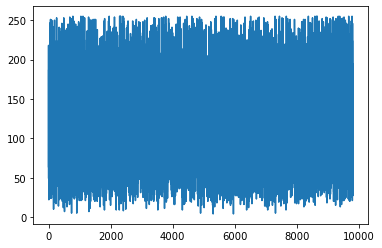

In [21]:
# Plot of length of reviews

senlen = [len(train_sentences[i]) for i in range(len(train_sentences))]

import matplotlib.pyplot as plt

plt.plot(np.arange(len(senlen)),senlen)

In [22]:
import sys
import numpy as np
import random as rn
import pandas as pd
import torch
#from pytorch_pretrained_bert import BertModel
from torch import nn
#from pytorch_pretrained_bert import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline


In [23]:
! pip install transformers

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [24]:
from transformers import BertTokenizer, BertModel, BertConfig
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [25]:
# Tokenizing inputs and adding special tokens

def input_id(input_review):
    input_ids = []
    MAX_LEN = 256
    for r in input_review:
        encoded_sent = tokenizer.encode(r,add_special_tokens = True) # Special tokens '[CLS]' and '[SEP]'
        input_ids.append(encoded_sent)
    return input_ids
train_id = input_id(train_sentences)
val_id = input_id(validation_sentences)

In [27]:
# Padding the Tokenized IDs
from keras.preprocessing.sequence import pad_sequences
padded_train_id = pad_sequences(train_id, maxlen=256 , truncating="post", padding="post")
padded_val_id = pad_sequences(val_id, maxlen=256 , truncating="post", padding="post")


In [28]:
# Masking the padded ID's

def masking(pid):
    attention_masks = []

    for r in pid:
    
        # Generating attention mask for sentences.
        #   - when there is 0 present as token id we are going to set mask as 0.
        #   - we are going to set mask 1 for all non-zero positive input id.
        att_mask = [int(token_id > 0) for token_id in r]
        attention_masks.append(att_mask)

    return attention_masks

train_mask = masking(padded_train_id)
val_mask = masking(padded_val_id)

In [30]:
#changing the numpy arrays into tensors for working on GPU.
import torch

tr_inputs = torch.tensor(padded_train_id)
val_inputs = torch.tensor(padded_val_id)

tr_labels = torch.tensor(train_labels.reshape(-1, 1)).float()
val_labels = torch.tensor(validation_labels.reshape(-1, 1)).float()

tr_masks = torch.tensor(train_mask)
val_masks = torch.tensor(val_mask)

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Deciding the batch size for training.

batch_size = 8

#DataLoader for our training set.
train_data = TensorDataset(tr_inputs, tr_masks, tr_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# DataLoader for our validation(test) set.
validation_data = TensorDataset(val_inputs, val_masks, val_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [31]:
# Building custom BERT model with additional Classification layer

class BertClassifier(nn.Module):
    
    def __init__(self, n_classes = 4):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(768, n_classes)
        self.softmax = nn.Softmax(dim=1)
  
    def forward(self, input_ids, attention_mask):
        
        _, pooled_output = self.bert(
        input_ids=input_ids,
        attention_mask=attention_mask
    )
        output = self.drop(pooled_output)
        #print(torch.max(output,dim = 1))
        return self.out(output)

In [32]:
# Checking for GPU processors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

torch.cuda.empty_cache()     # Clearing Cache space for fresh Model run


In [33]:
# Assigning model to GPU

model = BertClassifier()
model = model.to(device)

In [34]:

EPOCHS = 5

optimizer = Adam(model.parameters(), lr=3e-6)
total_steps = len(train_dataloader) * EPOCHS
loss_fn = nn.CrossEntropyLoss().to(device)

In [35]:
# Training the Model

for epoch_num in range(EPOCHS):
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, targets = tuple(t.to(device).long() for t in batch_data)

        outputs = model(
      token_ids,
      masks
    )
        #print(len(targets))
        targets = targets.reshape((1,len(targets)))

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets[0])

        train_loss += loss.item()
        
        
        model.zero_grad()
        loss.backward()
        

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        
        clear_output(wait=True)
        print('Epoch: ', epoch_num + 1)
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_data) / batch_size, train_loss / (step_num + 1)))

Epoch:  5
1225/1225.125 loss: 0.9603278455833432 


In [36]:
# Evaluating and Predicting the Movie Ratings for Validation data

model.eval()
bert_predicted = []
with torch.no_grad():
    for step_num, batch_data in enumerate(validation_dataloader):
        token_ids, masks, targets = tuple(t.to(device).long() for t in batch_data)

        outputs = model(
      token_ids,
      masks
    )
        
        targets = targets.reshape((1,len(targets)))

        _, preds = torch.max(outputs, dim=1)
        bert_predicted.append(preds)
    
pred = []
for i in range(len(bert_predicted)):
    for j in range(len(bert_predicted[i])):
        pred.append(bert_predicted[i][j])
    
pred = torch.tensor(pred).numpy()
        

In [37]:
print(classification_report(val_labels, pred))

              precision    recall  f1-score   support

         0.0       0.57      0.60      0.59       613
         1.0       0.43      0.32      0.37       612
         2.0       0.43      0.67      0.52       613
         3.0       0.44      0.28      0.34       613

    accuracy                           0.47      2451
   macro avg       0.47      0.47      0.45      2451
weighted avg       0.47      0.47      0.45      2451



## Below code is used only for miscellaneous comparison of accuracies with Word Emedding, LSTM, GRU and Glove Embedding models.

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
labels = pd.get_dummies(bal_data.Standard_rating.values)

In [40]:
# train-test split
from sklearn.model_selection import train_test_split
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(reviews, labels, 
                                                                                          test_size=0.2, 
                                                                                          stratify=labels)

In [41]:
# tokenize sentences
tokenizer = Tokenizer(num_words = 1500)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=120)

# convert validation dataset to sequence and pad sequences
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding='post', maxlen=120)

In [42]:
# Word Embedding

# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index), output_dim= 100, input_length=120),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 100)          2135500   
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                2424      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 100       
Total params: 2,138,024
Trainable params: 2,138,024
Non-trainable params: 0
_________________________________________________________________


In [43]:
# fit model
val_labels = np.array(validation_labels.idxmax(axis=1))
num_epochs = 10
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2)

# predict values
pred = model.predict(validation_padded)
ind_pred = []
for i in range(len(pred)):
    ind_pred.append(np.where(pred[i] == max(pred[i]))[0])
print(classification_report(val_labels, ind_pred))


Epoch 1/10
245/245 - 5s - loss: 0.5824 - accuracy: 0.2514 - val_loss: 0.5625 - val_accuracy: 0.2407
Epoch 2/10
245/245 - 5s - loss: 0.5618 - accuracy: 0.2682 - val_loss: 0.5618 - val_accuracy: 0.2611
Epoch 3/10
245/245 - 5s - loss: 0.5609 - accuracy: 0.2816 - val_loss: 0.5608 - val_accuracy: 0.2800
Epoch 4/10
245/245 - 4s - loss: 0.5586 - accuracy: 0.3171 - val_loss: 0.5589 - val_accuracy: 0.3029
Epoch 5/10
245/245 - 5s - loss: 0.5536 - accuracy: 0.3413 - val_loss: 0.5544 - val_accuracy: 0.3029
Epoch 6/10
245/245 - 4s - loss: 0.5447 - accuracy: 0.3815 - val_loss: 0.5498 - val_accuracy: 0.3406
Epoch 7/10
245/245 - 4s - loss: 0.5337 - accuracy: 0.4092 - val_loss: 0.5436 - val_accuracy: 0.3580
Epoch 8/10
245/245 - 5s - loss: 0.5210 - accuracy: 0.4287 - val_loss: 0.5383 - val_accuracy: 0.3692
Epoch 9/10
245/245 - 4s - loss: 0.5103 - accuracy: 0.4513 - val_loss: 0.5368 - val_accuracy: 0.3733
Epoch 10/10
245/245 - 5s - loss: 0.5021 - accuracy: 0.4556 - val_loss: 0.5376 - val_accuracy: 0.3672

In [44]:
# LSTM
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index), output_dim= 100, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

# compile model
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 100)          2135500   
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 128)          84480     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 100       
Total params: 2,262,856
Trainable params: 2,262,856
Non-trainable params: 0
_________________________________________________________________


In [45]:
# fit model
num_epochs = 10
history1 = model1.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2)

# predict values
pred1 = model1.predict(validation_padded)
ind_pred = []
for i in range(len(pred)):
    ind_pred.append(np.where(pred1[i] == max(pred1[i]))[0])
print(classification_report(val_labels, ind_pred))

Epoch 1/10
245/245 - 11s - loss: 0.5698 - accuracy: 0.2532 - val_loss: 0.5653 - val_accuracy: 0.2458
Epoch 2/10
245/245 - 10s - loss: 0.5598 - accuracy: 0.2851 - val_loss: 0.5554 - val_accuracy: 0.3259
Epoch 3/10
245/245 - 10s - loss: 0.5319 - accuracy: 0.3866 - val_loss: 0.5437 - val_accuracy: 0.3621
Epoch 4/10
245/245 - 10s - loss: 0.5005 - accuracy: 0.4570 - val_loss: 0.5499 - val_accuracy: 0.3682
Epoch 5/10
245/245 - 10s - loss: 0.4709 - accuracy: 0.5224 - val_loss: 0.5677 - val_accuracy: 0.3692
Epoch 6/10
245/245 - 9s - loss: 0.4455 - accuracy: 0.5656 - val_loss: 0.5810 - val_accuracy: 0.3590
Epoch 7/10
245/245 - 10s - loss: 0.4183 - accuracy: 0.6121 - val_loss: 0.6006 - val_accuracy: 0.3575
Epoch 8/10
245/245 - 10s - loss: 0.3909 - accuracy: 0.6533 - val_loss: 0.6467 - val_accuracy: 0.3493
Epoch 9/10
245/245 - 9s - loss: 0.3683 - accuracy: 0.6832 - val_loss: 0.6555 - val_accuracy: 0.3519
Epoch 10/10
245/245 - 10s - loss: 0.3455 - accuracy: 0.7079 - val_loss: 0.6683 - val_accuracy

In [46]:
# GRU

model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index), output_dim= 100, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

# compile model
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 100)          2135500   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               63744     
_________________________________________________________________
dense_4 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 100       
Total params: 2,202,440
Trainable params: 2,202,440
Non-trainable params: 0
_________________________________________________________________


In [47]:
# fit model
num_epochs = 10
history3 = model3.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2)

# predict values
pred3 = model3.predict(validation_padded)
ind_pred = []
for i in range(len(pred)):
    ind_pred.append(np.where(pred3[i] == max(pred3[i]))[0])
print(classification_report(val_labels, ind_pred))

Epoch 1/10
245/245 - 7s - loss: 0.5641 - accuracy: 0.2746 - val_loss: 0.5464 - val_accuracy: 0.3218
Epoch 2/10
245/245 - 7s - loss: 0.5322 - accuracy: 0.3684 - val_loss: 0.5423 - val_accuracy: 0.3457
Epoch 3/10
245/245 - 7s - loss: 0.5030 - accuracy: 0.4454 - val_loss: 0.5489 - val_accuracy: 0.3524
Epoch 4/10
245/245 - 7s - loss: 0.4706 - accuracy: 0.5159 - val_loss: 0.5648 - val_accuracy: 0.3590
Epoch 5/10
245/245 - 8s - loss: 0.4398 - accuracy: 0.5598 - val_loss: 0.6075 - val_accuracy: 0.3549
Epoch 6/10
245/245 - 7s - loss: 0.4129 - accuracy: 0.6082 - val_loss: 0.6125 - val_accuracy: 0.3457
Epoch 7/10
245/245 - 7s - loss: 0.3908 - accuracy: 0.6426 - val_loss: 0.6459 - val_accuracy: 0.3508
Epoch 8/10
245/245 - 7s - loss: 0.3642 - accuracy: 0.6731 - val_loss: 0.6727 - val_accuracy: 0.3514
Epoch 9/10
245/245 - 7s - loss: 0.3379 - accuracy: 0.7103 - val_loss: 0.7610 - val_accuracy: 0.3452
Epoch 10/10
245/245 - 7s - loss: 0.3113 - accuracy: 0.7335 - val_loss: 0.7539 - val_accuracy: 0.3355

In [48]:
embeddings_index = {}
with open('/kaggle/input/glove-embeddings/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embeddings_matrix = np.zeros((len(word_index) + 1, 100))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

In [49]:
# model initialization
model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index)+1, output_dim= 100, input_length=120, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

# compile model
model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model4.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 100)          2135600   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                2424      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 100       
Total params: 2,138,124
Trainable params: 2,524
Non-trainable params: 2,135,600
_________________________________________________________________


In [50]:
# fit model
num_epochs = 10
history4 = model4.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2)

# predict values
pred4 = model4.predict(validation_padded)
ind_pred = []
for i in range(len(pred)):
    ind_pred.append(np.where(pred4[i] == max(pred4[i]))[0])
print(classification_report(val_labels, ind_pred))

Epoch 1/10
245/245 - 1s - loss: 0.6021 - accuracy: 0.2587 - val_loss: 0.5715 - val_accuracy: 0.2453
Epoch 2/10
245/245 - 1s - loss: 0.5666 - accuracy: 0.2745 - val_loss: 0.5636 - val_accuracy: 0.2789
Epoch 3/10
245/245 - 1s - loss: 0.5608 - accuracy: 0.2909 - val_loss: 0.5604 - val_accuracy: 0.2963
Epoch 4/10
245/245 - 1s - loss: 0.5580 - accuracy: 0.3017 - val_loss: 0.5588 - val_accuracy: 0.2815
Epoch 5/10
245/245 - 1s - loss: 0.5564 - accuracy: 0.3089 - val_loss: 0.5576 - val_accuracy: 0.3090
Epoch 6/10
245/245 - 1s - loss: 0.5549 - accuracy: 0.3186 - val_loss: 0.5566 - val_accuracy: 0.3055
Epoch 7/10
245/245 - 1s - loss: 0.5535 - accuracy: 0.3191 - val_loss: 0.5552 - val_accuracy: 0.3197
Epoch 8/10
245/245 - 1s - loss: 0.5524 - accuracy: 0.3286 - val_loss: 0.5542 - val_accuracy: 0.3182
Epoch 9/10
245/245 - 1s - loss: 0.5509 - accuracy: 0.3378 - val_loss: 0.5534 - val_accuracy: 0.3228
Epoch 10/10
245/245 - 1s - loss: 0.5497 - accuracy: 0.3397 - val_loss: 0.5527 - val_accuracy: 0.3253